In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Load the data into a DataFrame
df = pd.read_csv('fy25-adopted-operating-budget.csv')

columns_to_convert = ['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget'] 
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce') 
result = df.groupby("Expense Category")[columns_to_convert].sum()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
result = result.T
print(result)

Expense Category     Contractual Services  Current Charges & Obligations  \
FY22 Actual Expense          485779976.63                   249268064.21   
FY23 Actual Expense          481250926.17                   261491712.10   
FY24 Appropriation           513881946.50                   293756234.48   
FY25 Budget                  555756693.55                   301099217.96   

Expense Category      Equipment  Fixed Expenses  Other Expenses  \
FY22 Actual Expense 31470466.07    184271922.50    888049954.21   
FY23 Actual Expense 41647071.35    198400126.10    989572580.29   
FY24 Appropriation  39863974.72    246202653.00   1010528812.80   
FY25 Budget         43410862.95    276436916.00   1058449371.40   

Expense Category     Personnel Services  Supplies & Materials  
FY22 Actual Expense       1960228185.04           39563147.00  
FY23 Actual Expense       2040852802.73           46474218.86  
FY24 Appropriation        2144210460.69           43720020.91  
FY25 Budget               2

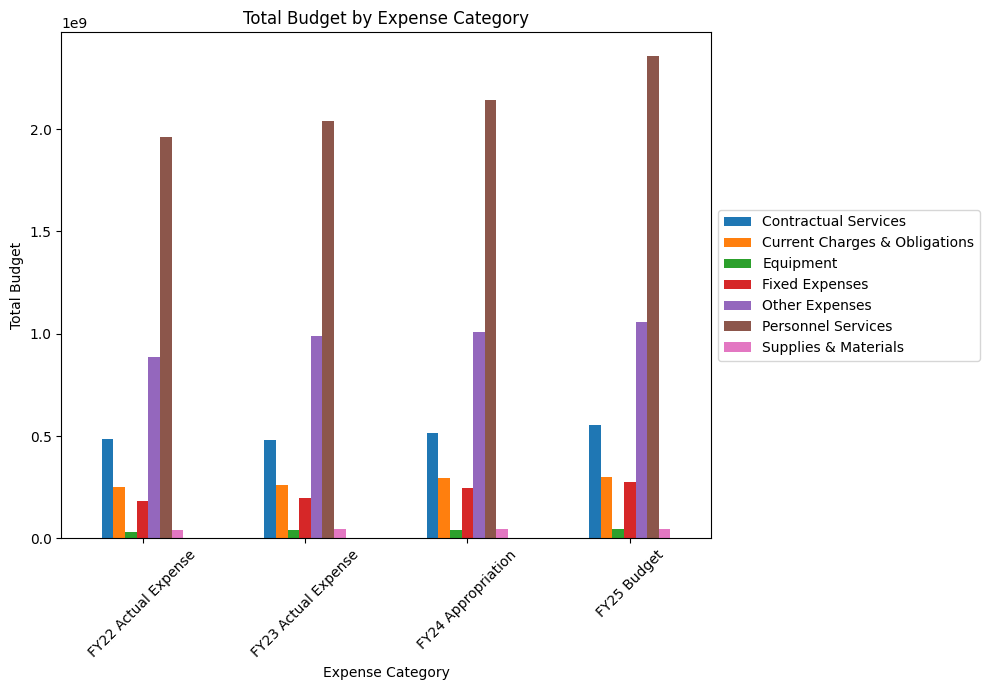

In [13]:
#plot the data

result.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Expense Category')
plt.ylabel('Total Budget')
plt.title('Total Budget by Expense Category')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [97]:
# read the data
df2020 = pd.read_csv('2020_earnings.csv', encoding='latin1')  
df2021 = pd.read_csv('employee-earnings-report-2021.csv', encoding='latin1')
df2022 = pd.read_csv('employee-earnings-report-2022.csv', encoding='latin1')
df2023 = pd.read_csv('employee-earnings-report-2023.csv',encoding='latin1')
df2024 = pd.read_csv('employee_earnings_report_2024.csv',encoding='latin1')

In [98]:
#2020年top10收入部门
df2020[' TOTAL EARNINGS '] = df2020[' TOTAL EARNINGS '].replace('[\$,]', '', regex=True).astype(float) 
year2020 = df2020.groupby('DEPARTMENT_NAME')[' TOTAL EARNINGS '].sum().sort_values(ascending=False)
year2020 = year2020.head(10)


In [99]:
#2021年top10收入部门
df2021['TOTAL_GROSS'] = df2021['TOTAL_GROSS'].replace('[\$,]', '', regex=True).astype(float) 
year2021 = df2021.groupby('DEPARTMENT_NAME')['TOTAL_GROSS'].sum().sort_values(ascending=False)
year2021= year2021.head(10)

In [100]:
#2022年top10收入部门
df2022['TOTAL_ GROSS'] = df2022['TOTAL_ GROSS'].replace('[\$,]', '', regex=True).astype(float)
year2022 = df2022.groupby('DEPARTMENT_NAME')['TOTAL_ GROSS'].sum().sort_values(ascending=False)
year2022= year2022.head(10)

In [101]:
#2023年top10收入部门
df2023['TOTAL GROSS'] = df2023['TOTAL GROSS'].replace('[\$,]', '', regex=True).astype(float)
year2023 = df2023.groupby('DEPARTMENT_NAME')['TOTAL GROSS'].sum().sort_values(ascending=False)
year2023= year2023.head(10)

In [102]:
#2024年top10收入部门
df2024['TOTAL GROSS'] = df2024['TOTAL GROSS'].replace('[\$,]', '', regex=True).astype(float)
year2024 = df2024.groupby('DEPARTMENT_NAME')['TOTAL GROSS'].sum().sort_values(ascending=False)
year2024= year2024.head(10)

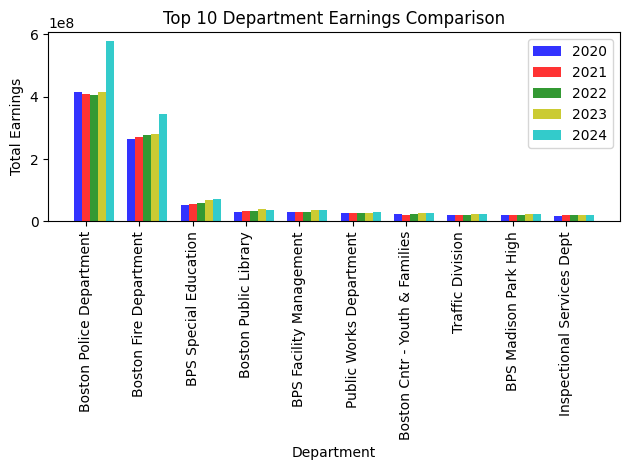

In [103]:
#把year2020,year2021,year2022,year2023,year2024画图，比较top10部门的收入
fig, ax = plt.subplots()
index = np.arange(10)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, year2020, bar_width, alpha=opacity, color='b', label='2020')
rects2 = plt.bar(index + bar_width, year2021, bar_width, alpha=opacity, color='r', label='2021')
rects3 = plt.bar(index + bar_width*2, year2022, bar_width, alpha=opacity, color='g', label='2022')
rects4 = plt.bar(index + bar_width*3, year2023, bar_width, alpha=opacity, color='y', label='2023')
rects5 = plt.bar(index + bar_width*4, year2024, bar_width, alpha=opacity, color='c', label='2024')

plt.xlabel('Department')
plt.ylabel('Total Earnings')
plt.title('Top 10 Department Earnings Comparison')
plt.xticks(index + bar_width, year2020.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [104]:
#2020年top10职位收入,我只想要department是Boston Police Department的数据
df2020 = df2020[df2020['DEPARTMENT_NAME'] == 'Boston Police Department']
job2020 = df2020.groupby('TITLE')[' TOTAL EARNINGS '].sum().sort_values(ascending=False)
job2020 = job2020.head(10)


In [105]:
#2021年top10职位收入
df2021 = df2021[df2021['DEPARTMENT_NAME'] == 'Boston Police Department']
job2021 = df2021.groupby('TITLE')['TOTAL_GROSS'].sum().sort_values(ascending=False)
job2021 = job2021.head(10)


In [106]:
#2022年top10职位收入
df2022 = df2022[df2022['DEPARTMENT_NAME'] == 'Boston Police Department']
job2022 = df2022.groupby('TITLE')['TOTAL_ GROSS'].sum().sort_values(ascending=False)
job2022 = job2022.head(10)

In [107]:
#2023年top10职位收入
df2023 = df2023[df2023['DEPARTMENT_NAME'] == 'Boston Police Department']
job2023 = df2023.groupby('TITLE')['TOTAL GROSS'].sum().sort_values(ascending=False)
job2023 = job2023.head(10)


In [108]:
#2024年top10职位收入
df2024 = df2024[df2024['DEPARTMENT_NAME'] == 'Boston Police Department']
job2024 = df2024.groupby('TITLE')['TOTAL GROSS'].sum().sort_values(ascending=False)
job2024 = job2024.head(10)

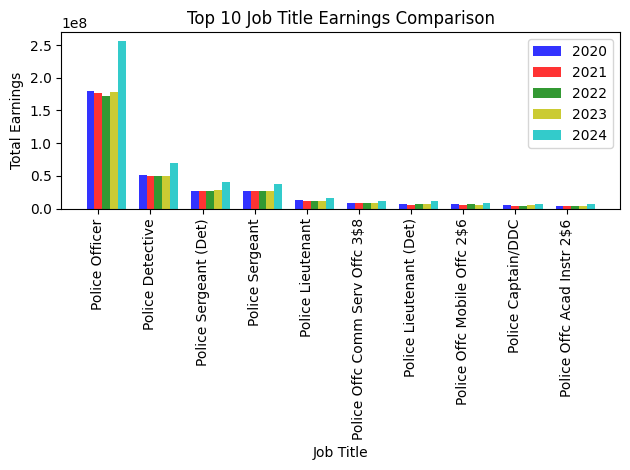

In [109]:
#把year2020,year2021,year2022,year2023,year2024画图，比较top10的收入
fig, ax = plt.subplots()
index = np.arange(10)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, job2020, bar_width, alpha=opacity, color='b', label='2020')
rects2 = plt.bar(index + bar_width, job2021, bar_width, alpha=opacity, color='r', label='2021')
rects3 = plt.bar(index + bar_width*2, job2022, bar_width, alpha=opacity, color='g', label='2022')
rects4 = plt.bar(index + bar_width*3, job2023, bar_width, alpha=opacity, color='y', label='2023')
rects5 = plt.bar(index + bar_width*4, job2024, bar_width, alpha=opacity, color='c', label='2024')

plt.xlabel('Job Title')
plt.ylabel('Total Earnings')
plt.title('Top 10 Job Title Earnings Comparison')
plt.xticks(index + bar_width, job2020.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()